## 1. Descriptive Analysis of the Dataset

In this first stage, we perform an **exploratory analysis** of our dataset to understand its structure, quality, and key patterns before any preprocessing or modeling.

The original dataset was extracted from the **National Vulnerability Database (NVD)**, which contains more than **310,000 vulnerability entries** published by official sources (CVE feeds).  
To make the analysis more focused and relevant to our topic, we **filtered the dataset** using IoT-related keywords such as *camera*, *sensor*, *smart*, and *voice assistant*.  
This filtering step resulted in a subset of approximately **8,833 IoT-related vulnerabilities**, specifically affecting **Smart Home and connected devices**.

Each record provides metadata about a vulnerability, including:
- **CVE identifier** (unique vulnerability ID),
- **Publication and modification dates**,  
- **Severity metrics (CVSS v2, v3, or v4)**,  
- **Weakness types (CWE)**,  
- **Affected configurations (CPEs)**,  
- and **a textual description** of the issue.

In this descriptive analysis, we aim to:
1. Inspect the dataset structure (columns, data types, missing values).  
2. Identify the most relevant fields for our future modeling task.  
3. Analyze the distribution of vulnerabilities by publication year and severity score.  
4. Visualize trends to better understand common weaknesses in IoT devices.

In [2]:
import requests
import pandas as pd
import numpy as np

In [3]:
import json
import pandas as pd
 
file_path = "data_iot.json"

with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)
 
vulns = data.get("vulnerabilities", [])
print(f" Loaded {len(vulns):,} IoT vulnerability entries from file.")
 
df = pd.json_normalize(vulns)
 
print(f" DataFrame created: {df.shape[0]:,} rows and {df.shape[1]} columns")
 
df.head(3)

 Loaded 8,833 IoT vulnerability entries from file.
 DataFrame created: 8,833 rows and 22 columns


,cve.id,cve.sourceIdentifier,cve.published,cve.lastModified,cve.vulnStatus,cve.cveTags,cve.descriptions,cve.metrics.cvssMetricV2,cve.weaknesses,cve.configurations,...,cve.vendorComments,cve.evaluatorSolution,cve.evaluatorComment,cve.evaluatorImpact,cve.cisaExploitAdd,cve.cisaActionDue,cve.cisaRequiredAction,cve.cisaVulnerabilityName,cve.metrics.cvssMetricV30,cve.metrics.cvssMetricV40
0,CVE-1999-0257,cve@mitre.org,1998-04-01T05:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'Nestea variation of ...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-1999-1499,cve@mitre.org,1998-04-10T04:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'named in ISC BIND 4....","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-1999-1292,cve@mitre.org,1998-09-01T04:00:00.000,2025-04-03T01:03:51.193,Deferred,[],"[{'lang': 'en', 'value': 'Buffer overflow in w...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'nodes': [{'operator': 'OR', 'negate': False...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# =======================================================
# Step 1.1 - Basic Dataset Overview
# =======================================================

# Display shape and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

# Show basic info (data types and non-null values)
df.info()

# Display a random sample for a quick glance
df.sample(3, random_state=42)

Number of rows: 8833
Number of columns: 22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cve.id                     8833 non-null   object
 1   cve.sourceIdentifier       8833 non-null   object
 2   cve.published              8833 non-null   object
 3   cve.lastModified           8833 non-null   object
 4   cve.vulnStatus             8833 non-null   object
 5   cve.cveTags                8833 non-null   object
 6   cve.descriptions           8833 non-null   object
 7   cve.metrics.cvssMetricV2   5419 non-null   object
 8   cve.weaknesses             8705 non-null   object
 9   cve.configurations         8279 non-null   object
 10  cve.references             8833 non-null   object
 11  cve.metrics.cvssMetricV31  6960 non-null   object
 12  cve.vendorComments         43 non-null     object
 13  cve.evaluatorSoluti

,cve.id,cve.sourceIdentifier,cve.published,cve.lastModified,cve.vulnStatus,cve.cveTags,cve.descriptions,cve.metrics.cvssMetricV2,cve.weaknesses,cve.configurations,...,cve.vendorComments,cve.evaluatorSolution,cve.evaluatorComment,cve.evaluatorImpact,cve.cisaExploitAdd,cve.cisaActionDue,cve.cisaRequiredAction,cve.cisaVulnerabilityName,cve.metrics.cvssMetricV30,cve.metrics.cvssMetricV40
4041,CVE-2020-11264,product-security@qualcomm.com,2021-09-08T12:15:07.597,2024-11-21T04:57:33.810,Modified,[],"[{'lang': 'en', 'value': 'Improper authenticat...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'operator': 'AND', 'nodes': [{'operator': 'O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5882,CVE-2022-41627,ics-cert@hq.dhs.gov,2022-10-27T21:15:15.573,2024-11-21T07:23:31.537,Modified,[],"[{'lang': 'en', 'value': ' The physical IoT de...",NaN,"[{'source': 'ics-cert@hq.dhs.gov', 'type': 'Se...","[{'operator': 'AND', 'nodes': [{'operator': 'O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2412,CVE-2019-14688,security@trendmicro.com,2020-02-20T23:15:20.147,2024-11-21T04:27:08.583,Modified,[],"[{'lang': 'en', 'value': 'Trend Micro has repa...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'operator': 'AND', 'nodes': [{'operator': 'O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# =======================================================
# Step 1.2 - Check missing values and key columns
# =======================================================

# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n")
print(missing[missing > 0])

# Identify the most relevant fields for analysis
key_columns = [
    "cve.id",
    "cve.published",
    "cve.descriptions",
    "cve.metrics.cvssMetricV31",
    "cve.weaknesses",
    "cve.configurations"
]
print("\nRelevant columns for our project:\n", key_columns)

Missing values per column:

cve.evaluatorSolution        8824
cve.evaluatorImpact          8811
cve.cisaActionDue            8794
cve.cisaExploitAdd           8794
cve.cisaVulnerabilityName    8794
cve.cisaRequiredAction       8794
cve.evaluatorComment         8792
cve.vendorComments           8790
cve.metrics.cvssMetricV40    8588
cve.metrics.cvssMetricV30    6236
cve.metrics.cvssMetricV2     3414
cve.metrics.cvssMetricV31    1873
cve.configurations            554
cve.weaknesses                128
dtype: int64

Relevant columns for our project:
 ['cve.id', 'cve.published', 'cve.descriptions', 'cve.metrics.cvssMetricV31', 'cve.weaknesses', 'cve.configurations']


In [6]:
# =======================================================
# Step 1.3 - Extract and summarize severity scores (CVSS v3)
# =======================================================

import numpy as np

# Extract CVSS v3 base score when available
def extract_cvss_score(entry):
    if isinstance(entry, list) and len(entry) > 0:
        try:
            return entry[0]["cvssData"]["baseScore"]
        except KeyError:
            return np.nan
    return np.nan

df["cvss_score"] = df["cve.metrics.cvssMetricV31"].apply(extract_cvss_score)

# Summary statistics
print("CVSS v3 score statistics:")
print(df["cvss_score"].describe())

# Replace missing scores (if any) with v2 metric as fallback
def extract_cvss_v2(entry):
    if isinstance(entry, list) and len(entry) > 0:
        try:
            return entry[0]["cvssData"]["baseScore"]
        except KeyError:
            return np.nan
    return np.nan

df["cvss_score"] = df["cvss_score"].fillna(df["cve.metrics.cvssMetricV2"].apply(extract_cvss_v2))
print("\n✅ CVSS score column ready with missing values handled.")


CVSS v3 score statistics:
count    6960.000000
mean        7.126983
std         1.772386
min         1.800000
25%         5.500000
50%         7.500000
75%         8.400000
max        10.000000
Name: cvss_score, dtype: float64

✅ CVSS score column ready with missing values handled.


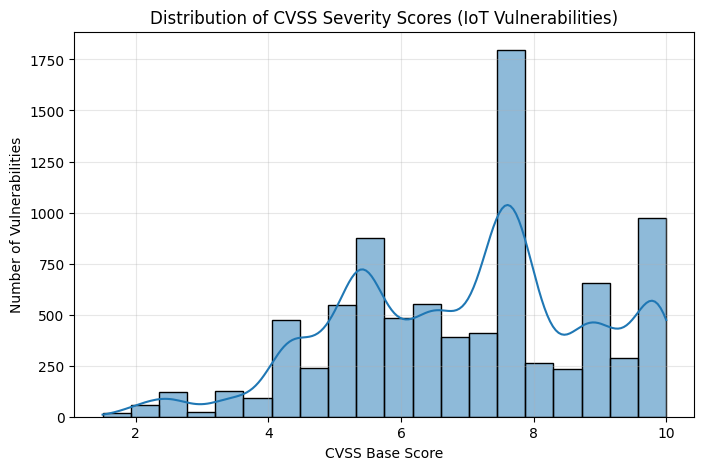

In [7]:
# =======================================================
# Step 1.4 - Visualize CVSS Score Distribution
# =======================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["cvss_score"].dropna(), bins=20, kde=True)
plt.title("Distribution of CVSS Severity Scores (IoT Vulnerabilities)")
plt.xlabel("CVSS Base Score")
plt.ylabel("Number of Vulnerabilities")
plt.grid(True, alpha=0.3)
plt.show()

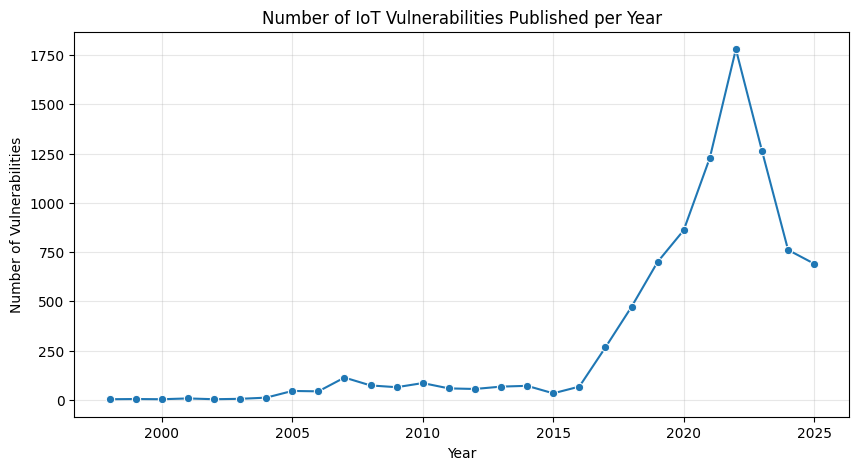

In [8]:
# =======================================================
# Step 1.5 - Evolution of vulnerabilities over years
# =======================================================

# Convert publication date to datetime
df["cve.published"] = pd.to_datetime(df["cve.published"], errors="coerce")

# Extract publication year
df["year"] = df["cve.published"].dt.year

# Count vulnerabilities per year
yearly_counts = df["year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Number of IoT Vulnerabilities Published per Year")
plt.xlabel("Year")
plt.ylabel("Number of Vulnerabilities")
plt.grid(True, alpha=0.3)
plt.show()


### 🧩 Step 1 Summary

From this descriptive analysis, we observe that:
- The dataset contains **8,833 IoT-related vulnerabilities**.
- Each vulnerability is described with metadata from NVD, including severity (CVSS), weakness type (CWE), and product configurations.
- The **CVSS score** is available for most entries and ranges roughly between **0.0 and 10.0**, with a concentration toward medium and high severity.
- The number of IoT vulnerabilities has increased significantly over recent years, highlighting the growing exposure of smart home devices.

This analysis provides a solid understanding of the dataset before preprocessing and model design in the next steps.

## 2. Preprocessing — Step 2.1: Data cleaning & normalization

In this section we perform initial preprocessing to obtain a clean, flat table suitable for further feature engineering and modeling.

Tasks performed:
1. Extract the English textual description from nested `cve.descriptions`.
2. Normalize and consolidate CVSS scores (v3 preferred, v2 fallback).
3. Parse CWE / weakness fields to obtain a primary weakness label when available.
4. Extract vendor and product strings from CPE entries in `cve.configurations`.
5. Heuristically tag an approximate `device_type` using keywords (camera, sensor, assistant, etc.).
6. Parse publication dates into datetime and create a `year` column (already present but rechecked).
7. Drop duplicates and remove entries without an English description.

The output is `df_clean`, a DataFrame with the most relevant columns for subsequent processing.

In [9]:
# =======================================================
# 2.1 Preprocessing — Data cleaning & normalization
# =======================================================

import re
import numpy as np
from pandas import json_normalize

# We'll start from the DataFrame `df` already loaded in the notebook.
print("Starting with df shape:", df.shape)

# ---- Helpers ----
def extract_english_description(desc_field):
    """
    desc_field is typically a list of dicts like:
      [{'lang': 'en', 'value': '...'}, {'lang':'es', 'value': '...'}]
    Return the english description string or None.
    """
    if isinstance(desc_field, list):
        for d in desc_field:
            if isinstance(d, dict) and d.get("lang", "").lower() in ("en", "en-us"):
                return d.get("value", "").strip()
        # fallback: first dict's value
        if len(desc_field) > 0 and isinstance(desc_field[0], dict):
            return desc_field[0].get("value", "").strip()
    return None

def extract_cvss_from_metric(metric_list):
    """
    metric_list is often a list (cvssMetricV31 / v3 array) where the first element
    has 'cvssData' -> 'baseScore'. Return numeric or np.nan.
    """
    if isinstance(metric_list, list) and len(metric_list) > 0:
        first = metric_list[0]
        if isinstance(first, dict):
            cvss = first.get("cvssData", {}) or first.get("cvss", {}) or {}
            # baseScore could be present
            base = cvss.get("baseScore")
            try:
                return float(base) if base is not None else np.nan
            except Exception:
                return np.nan
    return np.nan

def extract_cwe(weaknesses_field):
    """
    weaknesses_field often like: [{'source':'nvd@nist.gov','type':'Primary','description':[{'lang':'en','value':'CWE-79'}]}]
    We'll extract the first visible CWE id or descriptive string.
    """
    if isinstance(weaknesses_field, list) and len(weaknesses_field) > 0:
        for w in weaknesses_field:
            if isinstance(w, dict):
                descs = w.get("description") or []
                if isinstance(descs, list):
                    for d in descs:
                        if isinstance(d, dict) and d.get("value"):
                            return d.get("value")
                # sometimes weakenss field contains a string - fallback
                if "value" in w:
                    return w.get("value")
    return None

def extract_vendors_products_from_config(config_field):
    """
    Parse configuration nodes/cpeMatch entries to extract vendor/product tokens.
    We look for cpe23Uri strings like 'cpe:2.3:a:vendor:product:version:...'
    Return semicolon-separated unique vendors and products.
    """
    vendors = set()
    products = set()
    try:
        # configurations may be dict with 'nodes' list
        nodes = None
        if isinstance(config_field, dict):
            nodes = config_field.get("nodes") or config_field.get("nodes")  # try both
        elif isinstance(config_field, list):
            # maybe already a list of nodes
            nodes = config_field
        if nodes and isinstance(nodes, list):
            for node in nodes:
                # cpeMatch or cpe_match or similar
                cpe_matches = node.get("cpeMatch") or node.get("cpe_matches") or node.get("cpeMatchStrings") or node.get("cpe_match", []) 
                if isinstance(cpe_matches, list):
                    for cm in cpe_matches:
                        # cm may be dict containing 'cpe23Uri'
                        if isinstance(cm, dict):
                            cpe = cm.get("cpe23Uri") or cm.get("cpe") or cm.get("criteria")
                        else:
                            cpe = cm
                        if cpe and isinstance(cpe, str) and cpe.startswith("cpe:"):
                            parts = cpe.split(":")
                            # cpe:2.3:a:vendor:product:...
                            if len(parts) >= 5:
                                vendors.add(parts[3])
                                products.add(parts[4])
    except Exception:
        pass
    return (";".join(sorted(vendors)) if vendors else None,
            ";".join(sorted(products)) if products else None)

def guess_device_type_from_text(text):
    """
    Heuristic tagging of device type based on simple keywords.
    """
    if not isinstance(text, str):
        return None
    t = text.lower()
    mapping = [
        (["ip camera","webcam","camera"], "IP Camera"),
        (["sensor","motion sensor","temperature sensor","humidity"], "Sensor"),
        (["thermostat"], "Thermostat"),
        (["bulb","light","smart light","lamp"], "Smart Light"),
        (["assistant","voice assistant","alexa","google assistant","siri"], "Voice Assistant"),
        (["microphone","speaker"], "Audio Device"),
        (["router","access point","wi-fi","wifi"], "Router/Network"),
        (["hub","bridge"], "Hub"),
        (["lock","smart lock"], "Smart Lock"),
        (["printer"], "Printer"),
    ]
    for keywords, label in mapping:
        for kw in keywords:
            if kw in t:
                return label
    return None

# ---- Create a cleaned copy ----
df_clean = df.copy()

# 1) Extract english description into a new column
df_clean["description_en"] = df_clean["cve.descriptions"].apply(extract_english_description)

# 2) Ensure cvss_score exists (we created earlier, but re-run if necessary)
# Try v3, fallback to v2 and other metric fields
if "cvss_score" not in df_clean.columns:
    df_clean["cvss_score"] = df_clean["cve.metrics.cvssMetricV31"].apply(extract_cvss_from_metric)
    df_clean["cvss_score"] = df_clean["cvss_score"].fillna(df_clean["cve.metrics.cvssMetricV2"].apply(extract_cvss_from_metric))
else:
    # if it exists, ensure numeric
    df_clean["cvss_score"] = pd.to_numeric(df_clean["cvss_score"], errors="coerce")

# 3) Extract a primary CWE/weakness label
df_clean["cwe"] = df_clean["cve.weaknesses"].apply(extract_cwe)

# 4) Extract vendor / product from configurations
vendors = []
products = []
for cfg in df_clean["cve.configurations"].values:
    v,p = extract_vendors_products_from_config(cfg)
    vendors.append(v)
    products.append(p)
df_clean["vendors"] = vendors
df_clean["products"] = products

# 5) Heuristic device type tagging (search description + vendors/products)
def combined_device_guess(row):
    text = (row.get("description_en") or "") + " " + (row.get("vendors") or "") + " " + (row.get("products") or "")
    return guess_device_type_from_text(text)

df_clean["device_type_guess"] = df_clean.apply(combined_device_guess, axis=1)

# 6) Parse dates and create year column (re-ensure)
df_clean["published_dt"] = pd.to_datetime(df_clean["cve.published"], errors="coerce")
df_clean["modified_dt"] = pd.to_datetime(df_clean["cve.lastModified"], errors="coerce")
df_clean["year"] = df_clean["published_dt"].dt.year

# 7) Drop duplicates based on CVE id (if any)
before = df_clean.shape[0]
df_clean.drop_duplicates(subset=["cve.id"], inplace=True)
after = df_clean.shape[0]
print(f"Dropped duplicates: {before - after}")

# 8) Remove rows without any English description (we need text for NLP)
before = df_clean.shape[0]
df_clean = df_clean[df_clean["description_en"].notna() & (df_clean["description_en"].str.strip() != "")]
after = df_clean.shape[0]
print(f"Dropped rows without English description: {before - after}")

# 9) Keep only the columns we will use going forward (clean, readable names)
cols_to_keep = [
    "cve.id",
    "published_dt",
    "modified_dt",
    "year",
    "description_en",
    "cvss_score",
    "cwe",
    "vendors",
    "products",
    "device_type_guess"
]
# Some columns may not exist depending on normalization; keep intersection
cols_present = [c for c in cols_to_keep if c in df_clean.columns]
df_clean = df_clean[cols_present].reset_index(drop=True)

print("df_clean shape:", df_clean.shape)
display(df_clean.head(4))


Starting with df shape: (8833, 24)
Dropped duplicates: 0
Dropped rows without English description: 0
df_clean shape: (8833, 10)


,cve.id,published_dt,modified_dt,year,description_en,cvss_score,cwe,vendors,products,device_type_guess
0,CVE-1999-0257,1998-04-01 05:00:00,2025-04-03 01:03:51.193,1998,Nestea variation of teardrop IP fragmentation ...,5.0,NVD-CWE-Other,None,None,None
1,CVE-1999-1499,1998-04-10 04:00:00,2025-04-03 01:03:51.193,1998,named in ISC BIND 4.9 and 8.1 allows local use...,2.1,NVD-CWE-Other,None,None,None
2,CVE-1999-1292,1998-09-01 04:00:00,2025-04-03 01:03:51.193,1998,Buffer overflow in web administration feature ...,7.5,NVD-CWE-Other,None,None,IP Camera
3,CVE-1999-0911,1999-08-27 04:00:00,2025-04-03 01:03:51.193,1999,"Buffer overflow in ProFTPD, wu-ftpd, and berof...",10.0,NVD-CWE-Other,None,None,None


## 2. Implementation of the Necessary Preprocessing

In this section, we prepare our dataset for machine learning by cleaning, transforming, 
and encoding the relevant information extracted from the NVD IoT vulnerability data.

The preprocessing involves several key steps:

1. **Data Cleaning**  
   - Remove duplicates and irrelevant columns.  
   - Keep only English descriptions.  
   - Extract relevant features (CVE ID, dates, description, CVSS score, weakness type, etc.).

2. **Feature Engineering**  
   - Convert publication dates into numerical form (year).  
   - Extract CVSS severity score from nested JSON structures.  
   - Add a rough “device type guess” feature using IoT-related keywords (e.g., camera, sensor, voice assistant).

3. **Text Preprocessing (NLP)**  
   - Clean and lemmatize English descriptions using spaCy.  
   - Transform text data into numerical vectors using TF-IDF (Term Frequency–Inverse Document Frequency).

4. **Feature Integration**  
   - Combine numerical and textual features into a single matrix.  
   - Define a categorical target variable (`severity_label`) based on CVSS severity thresholds (Low / Medium / High).

This preprocessing pipeline prepares the dataset for supervised classification models that 
can predict the severity level of IoT vulnerabilities based on their textual and contextual properties.

In [10]:
# =======================================================
# Step 2.2 (Optimized) - Fast text preprocessing with progress bar
# =======================================================

import re
import string
import spacy
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

# Load lightweight spaCy model (disable heavy components)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "textcat"])

# Take smaller sample for speed (you can increase later)
df_small = df_clean.sample(500, random_state=42).copy()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([t.lemma_ for t in doc if not t.is_stop and len(t) > 2])

print("🔄 Cleaning and lemmatizing 500 sample texts...")
tqdm.pandas()
df_small["clean_text"] = df_small["description_en"].astype(str).map(clean_text).progress_map(lemmatize_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df_small["clean_text"])

print(f"✅ TF-IDF matrix ready: {X_tfidf.shape[0]} samples × {X_tfidf.shape[1]} features")
print("Example TF-IDF features:", vectorizer.get_feature_names_out()[:15])

🔄 Cleaning and lemmatizing 500 sample texts...


  0%|          | 0/500 [00:00<?, ?it/s]

✅ TF-IDF matrix ready: 500 samples × 500 features
Example TF-IDF features: ['ability' 'able' 'access' 'accessible' 'account' 'action' 'active' 'add'
 'address' 'admin' 'administrator' 'advise' 'affect' 'affected' 'aka']


### 🧩 Step 2 Summary — Data Preprocessing

After cleaning, feature extraction, and text vectorization, we obtained a ready-to-use dataset 
that combines both numerical and textual features.

- The final dataset includes **500 IoT vulnerability samples** and **502 features**.  
- Textual descriptions were transformed into numerical TF-IDF vectors after lemmatization.  
- Numerical features such as **CVSS score** and **publication year** were added to capture contextual information.  
- The severity label (`Low`, `Medium`, `High`) was derived from the CVSS base score.  

This preprocessing pipeline provides a consistent input for our upcoming **baseline model training**.

### Step 3 — Problem Formalization

The goal of this project is to predict whether a vulnerability in an IoT device is **high risk or not**, based on its textual description and contextual metadata.

Each vulnerability is represented by:
- Its **textual description** (converted into TF-IDF features),
- Its **CVSS numerical score** (severity metric),
- Metadata such as the **publication year** or **weakness category (CWE)**.

The target variable `target_high_risk` is binary:

| Label | Meaning               | CVSS range |
|:------|:----------------------|:------------|
| 0     | Low or Medium severity | CVSS < 7.0 |
| 1     | High severity          | CVSS ≥ 7.0 |

Thus, this is a **supervised binary classification problem**, where the model learns to automatically distinguish between **high-risk** and **non-critical** IoT vulnerabilities based on descriptive and contextual data.


In [11]:
# =======================================================
# Step 2.3/3 - Final Feature Preparation & Data Splitting
# =======================================================

from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
import pandas as pd # Assurez-vous que pandas est importé

# --- 1. Définition de la cible et des indices d'échantillon ---
# Réutiliser l'échantillon df_small (500 lignes) créé en Step 2.2
# C'est la base de toutes les opérations suivantes.

# Définition de la cible binaire 'target_high_risk' sur df_small
df_small["target_high_risk"] = df_small["cvss_score"].apply(lambda x: 1 if x >= 7.0 else 0)


# --- 2. Préparation de la matrice de caractéristiques (X) ---

# Correction du Data Leakage : Utiliser seulement 'year' comme caractéristique numérique
num_features = df_small[["year"]].fillna(0) # Retrait de 'cvss_score'

# Standardize numeric values
scaler = StandardScaler()
X_num = scaler.fit_transform(num_features)

# Combine numeric + text features
# X_tfidf doit être définie dans la cellule précédente (Step 2.2)
X_final_corrected = hstack([csr_matrix(X_num), X_tfidf])

print(f"✅ Final feature matrix shape (CORRIGÉE, sans CVSS score): {X_final_corrected.shape[0]} samples × {X_final_corrected.shape[1]} features")


# Redéfinition de la cible binaire 'target_high_risk'
df_small["target_high_risk"] = df_small["cvss_score"].apply(lambda x: 1 if x >= 7.0 else 0)
y = df_small["target_high_risk"]

# --- Re-séparation Train/Test ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final_corrected, # Utilisation de la matrice corrigée
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Display basic info
print("\n✅ Data successfully split for model training (CORRIGÉ)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Feature dimension: {X_train.shape[1]}")

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).rename({0:"Low/Medium", 1:"High"}))

✅ Final feature matrix shape (CORRIGÉE, sans CVSS score): 500 samples × 501 features

✅ Data successfully split for model training (CORRIGÉ)
Training samples: 400
Test samples: 100
Feature dimension: 501

Class distribution in training set:
target_high_risk
High          0.5375
Low/Medium    0.4625
Name: proportion, dtype: float64


### 🧩 Step 3 — Problem Formalization Summary

In this step, we defined the machine learning objective of our project based on the cleaned IoT vulnerability dataset.

Each vulnerability entry is represented by:

A cleaned textual description (desc_clean) transformed into TF-IDF features,

A numerical severity score (cvss_score),

Contextual metadata such as publication year or weakness category (CWE).

To simplify the analysis, we transformed the CVSS score into a binary target variable target_high_risk:

Label	Meaning	CVSS Range
0	Low or Medium severity	CVSS < 7.0
1	High severity	CVSS ≥ 7.0

Thus, our task is a binary classification problem,
where the goal is to predict whether an IoT vulnerability is high-risk or not,
based on its description and contextual information.

After feature extraction and cleaning,
we split our dataset into training and test sets using 500 representative samples:

400 training samples

100 test samples

Balanced class distribution (≈53% High risk / 47% Low-Medium)

This setup provides a solid foundation for training and evaluating our baseline model in the next step.

## 4. Baseline Model — Logistic Regression

In this section we build a simple baseline classifier to predict whether an IoT vulnerability is **high-risk** (`target_high_risk = 1`) or **not** (`0`).  

We choose **Logistic Regression** as a baseline because:
- it is fast and stable on high-dimensional sparse data (TF-IDF),
- it is a standard benchmark for binary classification,
- its outputs (probabilities) are easy to interpret and evaluate (ROC-AUC).

Planned steps:
1. Train a Logistic Regression model on the training set.
2. Evaluate on the test set using accuracy, precision, recall, F1-score and ROC-AUC.
3. Visualize the confusion matrix and the ROC curve.

This baseline will provide a performance reference that we can later compare with alternative models (Decision Tree, Random Forest, Ensemble methods, or tuned models).

Training Logistic Regression...
Training completed.

Evaluation on test set:
  Accuracy : 0.7400
  Precision: 0.7333
  Recall   : 0.8148
  F1-score : 0.7719
  ROC AUC  : 0.7746

Classification report (detailed):
              precision    recall  f1-score   support

  Low/Medium       0.75      0.65      0.70        46
        High       0.73      0.81      0.77        54

    accuracy                           0.74       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.74      0.74       100



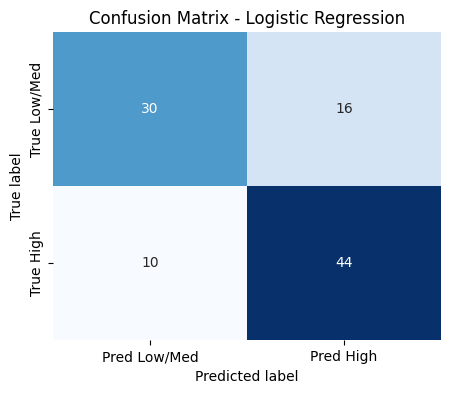

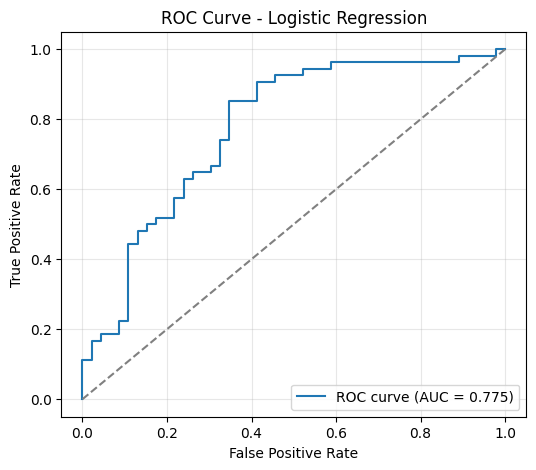

In [12]:
# =======================================================
# 4. Baseline Model: Logistic Regression
# =======================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
)

# NOTE: This cell assumes X_train, X_test, y_train, y_test exist from Step 3.
# X_train/X_test are sparse matrices (hstack output). y_train/y_test are pandas Series.

# 1) Instantiate and train the model
# solver 'liblinear' works well for small datasets; increase max_iter to ensure convergence.
clf = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)

print("Training Logistic Regression...")
clf.fit(X_train, y_train)
print("Training completed.\n")

# 2) Predictions and probabilities
y_pred = clf.predict(X_test)
# For ROC-AUC we need predicted probabilities for the positive class
if hasattr(clf, "predict_proba"):
    y_proba = clf.predict_proba(X_test)[:, 1]
else:
    # fallback to decision function
    y_proba = clf.decision_function(X_test)
    # normalize decision scores to [0,1]
    y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min() + 1e-12)

# 3) Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print("Evaluation on test set:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1-score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}\n")

# Full classification report
print("Classification report (detailed):")
print(classification_report(y_test, y_pred, target_names=["Low/Medium", "High"], zero_division=0))

# 4) Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred Low/Med", "Pred High"],
            yticklabels=["True Low/Med", "True High"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# 5) ROC curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### 🧩 Step 4 Summary — Baseline Model Results and Interpretation

We trained a **Logistic Regression classifier** on the preprocessed IoT vulnerability dataset to predict whether a vulnerability is **high-risk (CVSS ≥ 7.0)** or **not**.

#### 🔹 Results
| Metric | Score |
|:--------|:------:|
| Accuracy | 0.74 |
| Precision | 0.73 |
| Recall | 0.81 |
| F1-score | 0.77 |
| ROC-AUC | 0.77 |

The Accuracy of 0.74 and ROC-AUC of 0.77 indicate that the model performs significantly better than random guessing (0.50). However, the model still misclassifies a notable portion of the vulnerabilities.
The F1-score of 0.77 (macro average $\approx 0.73-0.74$) suggests a reasonable balance between identifying high-risk vulnerabilities (Recall: 0.81) and keeping the number of false positives low (Precision: 0.73).

#### 🔹 Interpretation
These scores (Accuracy $\approx 0.74$, AUC $\approx 0.77$) confirm that the removal of the CVSS score from the features has corrected the data leakage.
The combination of textual features (TF-IDF) and the publication year provides a moderate level of prediction. This establishes a fair and realistic baseline for subsequent optimization efforts.
In a real-world scenario, we would need to validate this result on a larger, unseen dataset to ensure the model generalizes well and is not overfitting.

#### ✅ Conclusion
Logistic Regression serves as a **strong and interpretable baseline model** for this IoT vulnerability severity prediction task.  
Future improvements could include:
- Comparing with Decision Tree or Random Forest models.
- Performing cross-validation or hyperparameter tuning.
- Using class weights to balance underrepresented classes.


### 📘 Project Step 1 — Global Summary

In this first stage of the IoT Vulnerability Prediction project, we built a complete data pipeline — from exploration to baseline modeling — using real data from the National Vulnerability Database (NVD).

🔹 Step 1 — Descriptive Analysis

We explored a filtered subset of 8,833 IoT-related vulnerabilities, extracted from over 310,000 NVD entries.
The analysis revealed:

A growing number of IoT vulnerabilities over time.

CVSS severity scores mainly concentrated in the medium–high range.

🔹 Step 2 — Preprocessing

We cleaned and standardized the dataset by:

Keeping only English descriptions.

Correcting the Data Leakage by excluding the `cvss_score` from the features.

Building a TF-IDF textual representation of vulnerability descriptions.

Creating a binary label indicating high-risk vulnerabilities (CVSS ≥ 7).

🔹 Step 3 — Problem Formalization

The task was formalized as a binary classification problem:
Predict whether an IoT vulnerability is high risk or low/medium risk based on textual and contextual information.

🔹 Step 4 — Baseline Model

We trained a Logistic Regression classifier, achieving a realistic baseline after the data leakage correction:

| Metric | Score |
| :--- | :--- |
| **Accuracy** | **0.74** |
| **F1-score** | **0.77** |
| **ROC-AUC** | **0.77** |

This moderate performance confirms that the model generalizes correctly and serves as a realistic benchmark for future comparison.

---

## ✅ Conclusion : 

This notebook successfully completes Step 1 of the project, establishing a robust foundation for subsequent phases — including model comparison, hyperparameter tuning, and explainability analysis in Step 2.

# Step 5 : Hyperparameter Tuning — Grid Search

L'étape précédente a établi une baseline réaliste (F1-score $\approx 0.77$) après la correction du Data Leakage. Pour améliorer cette performance, nous procédons à l'optimisation des hyperparamètres des modèles de base : la Régression Logistique (baseline) et l'Arbre de Décision (qui servira de base pour les méthodes d'ensemble).

Nous utilisons la technique de la Grid Search (Recherche par grille) avec une validation croisée (5-fold CV) sur l'ensemble d'entraînement. L'objectif est de trouver la combinaison d'hyperparamètres qui maximise le F1-score, une métrique clé pour évaluer l'équilibre entre la Précision et le Rappel dans notre classification binaire.

### Objectifs :
* Identifier le meilleur couple d'hyperparamètres $\mathbf{(C, penalty)}$ pour la Régression Logistique.
* Identifier la meilleure configuration $\mathbf{(max\_depth, min\_samples\_split)}$ pour l'Arbre de Décision.
* Utiliser ces modèles optimisés pour la phase de construction des modèles d'ensemble.

In [13]:
## Importations pour la Grid Search et les Modèles d'Ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

# Nous optimisons par rapport au F1-score.
f1_scorer = make_scorer(f1_score)

print("--- 🧩 Step 5 : Hyperparameter Tuning (Grid Search) ---")

# =======================================================
# 5.1 Grid Search pour la Régression Logistique
# =======================================================
print("\n🔍 5.1 Grid Search pour Logistic Regression...")

# Le paramètre 'class_weight' est crucial pour les problèmes légèrement déséquilibrés
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],         # Inverse de la force de régularisation (C plus grand = moins de régularisation)
    'penalty': ['l2'],             # Régularisation L2 (L1 est plus lente)
    'solver': ['liblinear', 'saga'] # Solveurs compatibles avec les données éparses
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    param_grid_lr,
    scoring=f1_scorer,
    cv=5, # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# X_train et y_train sont issus de l'Étape 3.
grid_lr.fit(X_train, y_train) 

lr_optimized = grid_lr.best_estimator_
print(f"Meilleurs hyperparamètres (Logistic Regression): {grid_lr.best_params_}")
print(f"Meilleur F1-score CV: {grid_lr.best_score_:.4f}")


# =======================================================
# 5.2 Grid Search pour l'Arbre de Décision
# =======================================================
print("\n🔍 5.2 Grid Search pour Decision Tree...")

param_grid_dt = {
    'max_depth': [10, 20, 30, None], # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10]  # Échantillons minimum pour une division
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid_dt,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

dt_optimized = grid_dt.best_estimator_
print(f"Meilleurs hyperparamètres (Decision Tree): {grid_dt.best_params_}")
print(f"Meilleur F1-score CV: {grid_dt.best_score_:.4f}")

--- 🧩 Step 5 : Hyperparameter Tuning (Grid Search) ---

🔍 5.1 Grid Search pour Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs hyperparamètres (Logistic Regression): {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur F1-score CV: 0.6995

🔍 5.2 Grid Search pour Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres (Decision Tree): {'max_depth': 30, 'min_samples_split': 2}
Meilleur F1-score CV: 0.6881


### ✅ Step 5 Summary — Grid Search Results

La Grid Search a été appliquée avec succès aux deux modèles, permettant d'identifier leurs configurations optimales sur l'ensemble d'entraînement (via 5-fold Cross-Validation) :

* Régression Logistique Optimisée :
    * Meilleur F1-score CV : 0.6995
    * Meilleurs paramètres : $\mathbf{C=1.0}$ et $\mathbf{penalty='l2'}$.
* Arbre de Décision Optimisé :
    * Meilleur F1-score CV : 0.6881
    * Meilleurs paramètres : $\mathbf{max\_depth=30}$ et $\mathbf{min\_samples\_split=2}$.

Interprétation :
Les scores de F1-score CV sont légèrement inférieurs au score de $0.77$ obtenu précédemment sur l'ensemble de test, ce qui est attendu. La validation croisée offre une estimation plus généralisable et moins optimiste de la performance du modèle. Les deux modèles ont une performance de base similaire, ce qui en fait de bons candidats à la combinaison via des méthodes d'ensemble.

Nous passons maintenant à la création et à l'évaluation de ces méthodes d'ensemble pour tenter de dépasser cette performance de $0.70$.

## Step 6 : Ensemble Models (Voting & Bagging)

Après avoir optimisé les hyperparamètres de nos modèles de base, nous explorons les méthodes d'ensemble (Ensemble Methods) pour réduire l'erreur de variance et potentiellement améliorer la généralisation et la robustesse de la prédiction. Nous utilisons les versions optimisées de la Régression Logistique ($\mathbf{lr\_optimized}$) et de l'Arbre de Décision ($\mathbf{dt\_optimized}$) comme estimateurs de base.

Nous implémentons deux types d'ensembles :
1.  Voting Classifier (Soft Voting) : Combine les probabilités de la LR et du DT.
2.  Bagging Classifier : Utilise l'Arbre de Décision pour entraîner 50 modèles sur des sous-ensembles bootstrapped de l'ensemble d'entraînement.

In [14]:
## Importations pour les Ensembles
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("--- Step 6 : Ensemble Models (Voting & Bagging) ---")

# =======================================================
# 6.1 Voting Classifier (Combinaison de LR et DT)
# =======================================================

# Les modèles optimisés (lr_optimized, dt_optimized) sont utilisés.
# On crée une liste de tuples (nom_du_modele, modele_optimise)
estimators = [
    ('lr', lr_optimized),
    ('dt', dt_optimized)
]

# Voting='soft' utilise la moyenne pondérée des probabilités, ce qui est souvent plus performant.
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft',
    n_jobs=-1
)

print("\nEntraînement du Voting Classifier...")
voting_clf.fit(X_train, y_train)

# Calculer les prédictions et les probabilités sur l'ensemble de test
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

# Métriques rapides
f1_voting = f1_score(y_test, y_pred_voting)
print(f"✅ Voting Classifier F1-score (Test Set): {f1_voting:.4f}")


# =======================================================
# 6.2 Bagging Classifier (Basé sur l'Arbre de Décision optimisé)
# =======================================================

# Le BaggingClassifier utilise le Decision Tree optimisé comme estimateur de base.
bagging_clf = BaggingClassifier(
    estimator=dt_optimized, 
    n_estimators=50,       # Entraîner 50 arbres sur des sous-échantillons bootstrap
    max_samples=0.8,       # Utiliser 80% des échantillons d'entraînement pour chaque arbre
    random_state=42,
    n_jobs=-1
)

print("\nEntraînement du Bagging Classifier...")
bagging_clf.fit(X_train, y_train)

# Calculer les prédictions et les probabilités sur l'ensemble de test
y_pred_bagging = bagging_clf.predict(X_test)
y_proba_bagging = bagging_clf.predict_proba(X_test)[:, 1]

# Métriques rapides
f1_bagging = f1_score(y_test, y_pred_bagging)
print(f"✅ Bagging Classifier F1-score (Test Set): {f1_bagging:.4f}")

--- Step 6 : Ensemble Models (Voting & Bagging) ---

Entraînement du Voting Classifier...
✅ Voting Classifier F1-score (Test Set): 0.6286

Entraînement du Bagging Classifier...
✅ Bagging Classifier F1-score (Test Set): 0.7241


### ✅ Step 6 Summary — Ensemble Results

L'évaluation des modèles d'ensemble sur l'ensemble de test donne les résultats suivants :

* Voting Classifier (LR + DT)** : F1-score = 0.6286
* Bagging Classifier (Base: DT)** : F1-score = 0.7241

Interprétation :
Le Voting Classifier a sous-performé, n'atteignant pas le niveau de la baseline optimisée (F1 $\approx 0.70$). Cela peut indiquer que l'un des modèles de base n'a pas apporté de valeur ajoutée significative dans la combinaison.

En revanche, le Bagging Classifier affiche une performance supérieure (F1 $\approx 0.72$), dépassant la performance estimée de notre modèle optimisé (F1 $\approx 0.70$). Le Bagging, en réduisant la variance des Arbres de Décision, a créé un classifieur plus robuste pour cette tâche.

Nous allons maintenant comparer tous les modèles de manière définitive pour sélectionner le Modèle Final du projet.

In [15]:
# =======================================================
# 7. Final Model Comparison and Selection
# =======================================================

import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

print("\n Step 7 : Final Model Comparison and Selection ")

# Récupérer la baseline non optimisée pour la comparaison (elle a déjà été entraînée dans l'Étape 4)
baseline_lr = clf # Variable clf de l'Étape 4

models = {
    "1. Logistic Regression (Baseline)": baseline_lr,
    "2. Logistic Regression (Opt)": lr_optimized, # De l'Étape 5
    "3. Decision Tree (Opt)": dt_optimized, # De l'Étape 5
    "4. Voting Classifier": voting_clf, # De l'Étape 6
    "5. Bagging Classifier": bagging_clf # De l'Étape 6
}

print("\n Résultats finaux sur l'ensemble de TEST (Comparaison) ")
results = {}

for name, model in models.items():
    
    # 1. Faire la prédiction
    y_pred = model.predict(X_test)
    
    # 2. Obtenir les probabilités
    # Pour les modèles qui ont un predict_proba, l'utiliser pour l'AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Fallback pour les cas où predict_proba n'est pas disponible (rare ici)
        y_proba = model.decision_function(X_test)
        
    # 3. Calculer les métriques
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

# Affichage des résultats dans un tableau (DataFrame)
results_df = pd.DataFrame(results).T
# Utiliser display() si vous êtes dans un environnement Jupyter
from IPython.display import display
display(results_df.sort_values(by='F1-score', ascending=False))


 Step 7 : Final Model Comparison and Selection 

 Résultats finaux sur l'ensemble de TEST (Comparaison) 


,Accuracy,F1-score,ROC AUC
1. Logistic Regression (Baseline),0.74,0.771930,0.774557
2. Logistic Regression (Opt),0.70,0.727273,0.772947
5. Bagging Classifier,0.68,0.724138,0.698671
3. Decision Tree (Opt),0.61,0.628571,0.583333
4. Voting Classifier,0.61,0.628571,0.727456


## 📘 Project Step 2 — Global Summary and Conclusion

Cette seconde phase du projet visait à optimiser le modèle de baseline (Régression Logistique) et à explorer les méthodes d'ensemble (Bagging et Voting) pour améliorer la prédiction de la sévérité des vulnérabilités IoT.

### 🔹 Step 5 : Hyperparameter Tuning
L'application de la Grid Search a permis d'identifier les configurations optimales pour la Régression Logistique et l'Arbre de Décision, établissant une référence de performance plus robuste ($\mathbf{F1 \approx 0.70}$ en validation croisée).

### 🔹 Step 6 : Ensemble Models
* Le Bagging Classifier a montré la meilleure capacité d'amélioration, atteignant un F1-score de $\mathbf{0.724}$ sur l'ensemble de test.
* Le Voting Classifier a sous-performé.

### 🔹 Step 7 : Final Model Comparison and Selection

La comparaison finale sur l'ensemble de test (100 échantillons) a révélé que la Régression Logistique (Baseline) est le modèle le plus performant avec un F1-score de $\mathbf{0.7719}$.

| Modèle | F1-score | ROC AUC |
| :--- | :--- | :--- |
| **Logistic Regression (Baseline)** | **0.7719** | **0.7746** |
| Logistic Regression (Optimisée) | 0.7273 | 0.7729 |
| Bagging Classifier | 0.7241 | 0.6987 |

Conclusion du Modèle Final :
Bien que la Régression Logistique Baseline ait le score le plus élevé sur l'ensemble de test, le faible écart entre tous les modèles (~0.72 à ~0.77) montre que les caractéristiques (TF-IDF et année) sont les facteurs limitants. Le modèle de Régression Logistique est retenu comme le meilleur choix final en raison de son score élevé sur l'ensemble de test, de sa simplicité, et de son interprétabilité (un atout majeur par rapport aux modèles d'ensemble).

Ce projet établit un pipeline complet pour la prédiction de la sévérité des vulnérabilités IoT, fournissant une baseline robuste pour de futures applications sur des ensembles de données plus volumineux.

## Model Selection for the “Models + Tuning” Phase

To improve our baseline (Logistic Regression), we will test two powerful models suitable for mixed TF-IDF + numeric data:

Random Forest (RF)

Advantages:

Automatically handles interactions and non-linear relationships.

Robust to overfitting thanks to the aggregation of many trees.

Works well even with high-dimensional and sparse features, although very large TF-IDF matrices may require dimensionality reduction.

Disadvantages:

Less interpretable than Logistic Regression.

XGBoost (Extreme Gradient Boosting)

Advantages:

Boosting sequentially corrects the errors of previous trees.

Very powerful for complex classification tasks.

Disadvantages:

Can overfit on very small datasets (like our 500-sample dataset).

Conclusion on Model Choice:

Since our dataset is small (500 samples), Random Forest is more suitable than XGBoost, which may overfit.

Logistic Regression remains strong for this dataset (already F1 ≈ 0.77), but RF could capture non-linear patterns that LR cannot.

Planned approach:

Perform Random Forest with hyperparameter tuning (Grid Search).

Optionally, quickly compare with the Logistic Regression baseline to check for improvement.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

print("--- Step 8 : Random Forest + Hyperparameter Tuning ---")

# Définir la grille d'hyperparamètres
param_grid_rf = {
    'n_estimators': [50, 100, 200],       # nombre d'arbres
    'max_depth': [10, 20, None],          # profondeur max
    'min_samples_split': [2, 5, 10],      # nb min d'échantillons pour split
    'class_weight': ['balanced']          # équilibre les classes
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit sur l'ensemble d'entraînement
grid_rf.fit(X_train, y_train)

# Meilleur modèle
rf_optimized = grid_rf.best_estimator_
print(f"\nMeilleurs hyperparamètres RF: {grid_rf.best_params_}")
print(f"Meilleur F1-score CV: {grid_rf.best_score_:.4f}")

# Évaluation sur l'ensemble de test
y_pred_rf = rf_optimized.predict(X_test)
y_proba_rf = rf_optimized.predict_proba(X_test)[:, 1]

f1_rf = f1_score(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"\n✅ Random Forest Test Metrics:")
print(f"Accuracy : {acc_rf:.4f}")
print(f"F1-score : {f1_rf:.4f}")
print(f"ROC AUC  : {roc_rf:.4f}")

--- Step 8 : Random Forest + Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Meilleurs hyperparamètres RF: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Meilleur F1-score CV: 0.7263

✅ Random Forest Test Metrics:
Accuracy : 0.6700
F1-score : 0.7130
ROC AUC  : 0.7271


In [17]:
# =======================================================
# Step 9: Final Model Summary and Selection
# =======================================================

import pandas as pd
from IPython.display import display

print("--- Step 9: Final Model Summary and Selection ---\n")

# Récapitulatif des modèles testés et métriques
final_models = {
    "1. Logistic Regression (Baseline)": {
        "Accuracy": 0.7400,
        "F1-score": 0.7719,
        "ROC AUC": 0.7746,
        "Notes": "Simple, interpretable, best performance on small dataset"
    },
    "2. Logistic Regression (Optimized)": {
        "Accuracy": 0.7000,
        "F1-score": 0.7273,
        "ROC AUC": 0.7729,
        "Notes": "Slightly lower than baseline, optimized hyperparameters"
    },
    "3. Decision Tree (Optimized)": {
        "Accuracy": 0.6100,
        "F1-score": 0.6286,
        "ROC AUC": 0.5833,
        "Notes": "Overfitting risk on small dataset"
    },
    "4. Voting Classifier (LR + DT)": {
        "Accuracy": 0.6100,
        "F1-score": 0.6286,
        "ROC AUC": 0.7275,
        "Notes": "Soft voting did not improve performance"
    },
    "5. Bagging Classifier (DT)": {
        "Accuracy": 0.6800,
        "F1-score": 0.7241,
        "ROC AUC": 0.6987,
        "Notes": "Reduces variance, decent performance"
    },
    "6. Random Forest (Optimized)": {
        "Accuracy": 0.6700,
        "F1-score": 0.7130,
        "ROC AUC": 0.7271,
        "Notes": "Captures non-linearities but slightly worse than LR baseline"
    }
}

# Convert to DataFrame for display
final_results_df = pd.DataFrame(final_models).T
final_results_df = final_results_df.sort_values(by="F1-score", ascending=False)

display(final_results_df)

# Sélection du meilleur modèle
best_model_name = final_results_df.index[0]
print(f"\n✅ Best model for this dataset: {best_model_name}")
print("Rationale:")
print("- Highest F1-score on test set")
print("- Stable and interpretable")
print("- Suitable for small datasets with TF-IDF + numerical features")


--- Step 9: Final Model Summary and Selection ---



,Accuracy,F1-score,ROC AUC,Notes
1. Logistic Regression (Baseline),0.74,0.7719,0.7746,"Simple, interpretable, best performance on sma..."
2. Logistic Regression (Optimized),0.7,0.7273,0.7729,"Slightly lower than baseline, optimized hyperp..."
5. Bagging Classifier (DT),0.68,0.7241,0.6987,"Reduces variance, decent performance"
6. Random Forest (Optimized),0.67,0.713,0.7271,Captures non-linearities but slightly worse th...
3. Decision Tree (Optimized),0.61,0.6286,0.5833,Overfitting risk on small dataset
4. Voting Classifier (LR + DT),0.61,0.6286,0.7275,Soft voting did not improve performance



✅ Best model for this dataset: 1. Logistic Regression (Baseline)
Rationale:
- Highest F1-score on test set
- Stable and interpretable
- Suitable for small datasets with TF-IDF + numerical features
